In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm

from datetime import datetime

df = pd.read_csv("data/tovar_moving.csv",  index_col=['date'], parse_dates=['date']) # считываем датасет

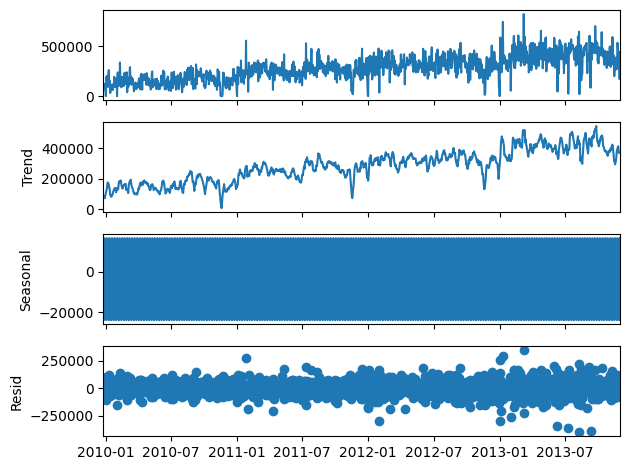

In [7]:
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [8]:
test_df = df.iloc[-1]
train_df = df.iloc[:-1]

In [11]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level = alpha, optimized = False)
exp_pred = model.forecast(1)
print("Предсказано: ", exp_pred)
print("Реально: ", test_df)

Предсказано:  2013-12-02    225015.522647
Freq: D, dtype: float64
Реально:  qty    423846.0
Name: 2013-12-02 00:00:00, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_df)

adf:  -2.2553026410338033
p-value:  0.18678903123416346
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
есть единичные корни, ряд не стационарен


In [14]:
otg1diff = train_df.diff(periods=1).dropna()
stat_test(otg1diff)

adf:  -13.780727380503794
p-value:  9.307227521339452e-26
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
единичных корней нет, ряд стационарен


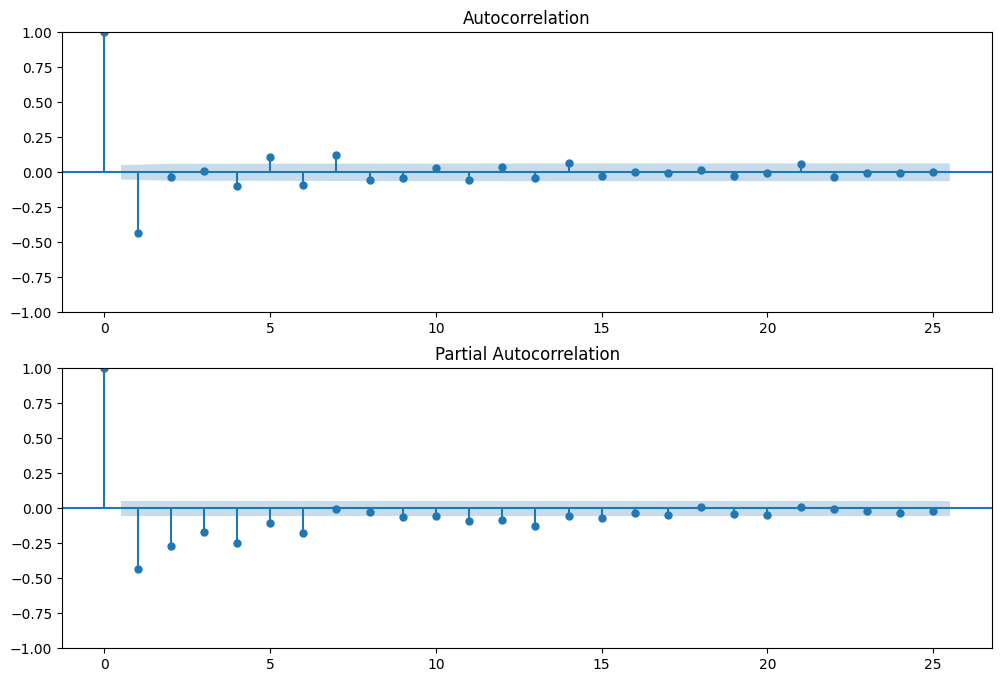

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=25, ax=ax2)

In [20]:
p =6

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(otg1diff, lags=p).fit()
print(ar_model.summary())

ar_pred = ar_model.predict(start=len(otg1diff), end=(len(otg1diff)), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1437
Model:                     AutoReg(6)   Log Likelihood              -18197.626
Method:               Conditional MLE   S.D. of innovations          80642.497
Date:                Sat, 19 Oct 2024   AIC                          36411.251
Time:                        21:57:06   BIC                          36453.380
Sample:                    01-01-2010   HQIC                         36426.983
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        625.7761   2132.009      0.294      0.769   -3552.885    4804.437
qty.L1        -0.6928      0.026    -26.583      0.000      -0.744      -0.642
qty.L2        -0.5560      0.031    -17.749      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2013-12-02    183773.199142
Freq: D, dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error

mean_squared_error(otg1diff, ar_pred), mean_squared_error(otg1diff, exp_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1437, 1]